# Scikit-learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_wine
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Regression
Regression is a supervised machine learning task that the goal is to predict a continuous numerical value based on input features.

In [2]:
# Data
prices = fetch_california_housing()

In [3]:
# Features and target
X = prices.data
y = prices.target

In [4]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [5]:
# Fit
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [6]:
# Predict
predictions = lm.predict(X_test)

In [7]:
# Results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5620561497051438
MSE: 6.160634987005563
RMSE: 2.482062647679458


# Classification
Classification is a supervised machine learning task where the goal is to assign input data into predefined categories or classes based on their characteristics.

In [8]:
# Data
wines = load_wine()

In [9]:
# Features and target
X = wines.data
y = wines.target

In [10]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
# Fit
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# Predict
predictions = dtree.predict(X_test)

In [13]:
# Results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.90      0.96      0.93        27
           2       0.95      1.00      0.98        20

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



In [14]:
# Results
print(confusion_matrix(y_test,predictions))

[[22  3  0]
 [ 0 26  1]
 [ 0  0 20]]


# Clustering
Clustering is an unsupervised machine learning task that is goal is to group similar data points together based on their intrinsic similarities, without any predefined categories.

In [15]:
#Data 
blobs = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

In [16]:
# Features and target
X = blobs[0]
y = blobs[1]

In [17]:
# Fit
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

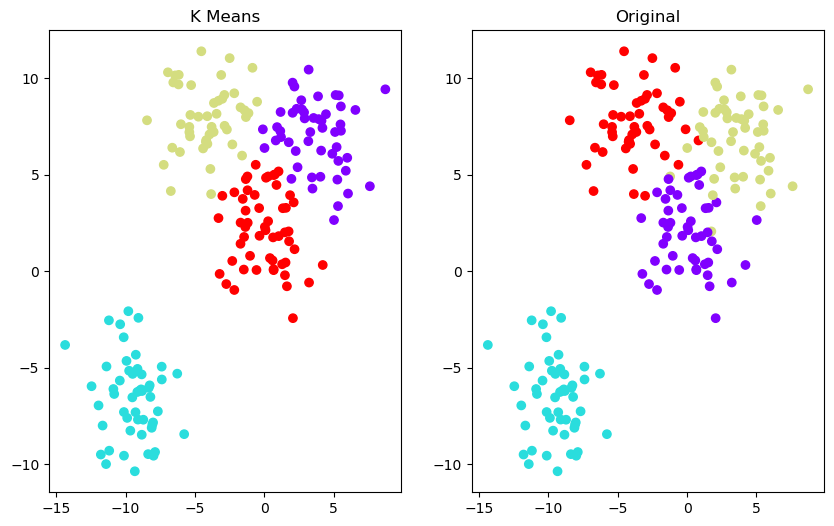

In [18]:
# Results
f, axs = plt.subplots(1, 2, figsize=(10,6))
axs[0].set_title('K Means')
axs[0].scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
axs[1].set_title("Original")
axs[1].scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

# Dimensionality Reduction
Dimensionality reduction is a process of reducing the number of input features in a dataset while retaining the important information, typically used to simplify data representation and improve computational efficiency.

In [19]:
# Data
cancer = load_breast_cancer()

In [20]:
# Features and target
X = cancer.data
y = cancer.target

In [21]:
# Fit
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [22]:
# Number of features
len(cancer.feature_names)

30

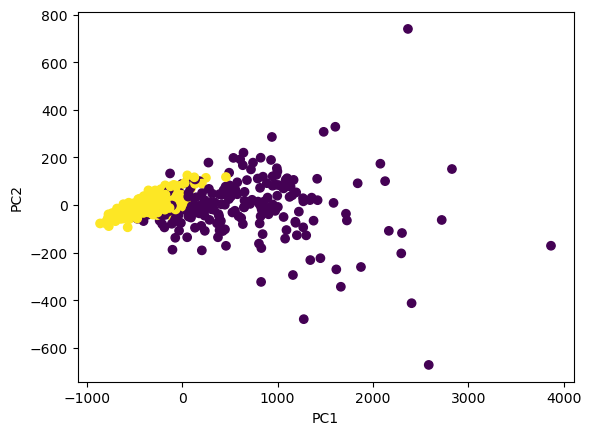

In [23]:
# Results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Pipelines
Pipelines allow for the seamless chaining of multiple data processing and machine learning steps into a single object, simplifying the workflow and improving code readability.

In [24]:
# Data
data = load_breast_cancer()

In [25]:
# Features and target
X = data.data
y = data.target

In [26]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [27]:
# Cross validation
scores = cross_val_score(pipeline, X, y, cv=5)

In [28]:
# Results
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 0.98 (+/- 0.01)
